<a href="https://colab.research.google.com/github/arthurfalcao/decision-support-systems/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear  - Don Pastello

## Descrição:

Após altos valores de cancelamento, foi feito uma previsão do valor a partir de duas variáveis, 1ª: se é fim de semana ou não; 2ª: valor de venda. Com essa previsão podemos correr atrás dos principais motivos de cancelamento e realizar as medidas cabíveis, como treinar os funcionários ou melhorar o sistema PDV.

## Dados:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>venda_dia</b> - Valor de vendas no dia (R&#36;)</li>
    <li><b>valor_canc</b> - Valor cancelado (R&#36;)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
</ul>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
dataframe = pd.read_csv('./don_pastello.csv', sep=',')
dataframe

,data,venda_dia,venda_acum,venda_media,proj_acum,merc_dia,merc_acum,perc_merc,dif_dia_caixa,dif_acum,valor_canc,perc_canc,canc_acum,perc_canc_acum,fds
0,01/08/2019,4944.7,4944.7,4944.70,4944.7,608.53,608.53,12.31,-1.90,-1.90,817.63,16.54,817.63,16.54,0
1,02/08/2019,6415.5,11360.2,5680.10,11360.2,0.00,608.53,5.36,-0.75,-2.65,769.85,12.00,1587.48,13.97,0
2,03/08/2019,7262.9,18623.1,6207.70,18623.1,0.00,608.53,3.27,-9.62,-12.27,647.18,8.91,2234.66,12.00,1
3,04/08/2019,6069.9,24693.0,6173.25,24693.0,0.00,608.53,2.46,5.45,-6.82,1073.59,17.69,3308.25,13.40,1
4,05/08/2019,7113.4,31806.4,6361.28,31806.4,2340.03,2948.56,9.27,-15.95,-22.77,1172.27,16.48,4480.52,14.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26/11/2019,4498.7,154777.9,5953.00,154777.9,8144.18,35543.44,22.96,5.50,293.69,885.95,19.69,"31,058.88",20.07,0
118,27/11/2019,5050.5,159828.4,5919.57,159828.4,0.00,35543.44,22.24,-77.00,216.69,1123.63,22.25,"32,182.51",20.14,0
119,28/11/2019,5706.4,165534.8,5911.96,165534.8,304.83,35848.27,21.66,46.25,262.94,1883.78,33.01,"34,066.29",20.58,0
120,29/11/2019,11885.5,177420.3,6117.94,177420.3,2435.25,38283.52,21.58,350.25,613.19,2926.12,24.62,"36,992.41",20.85,0


## Estatísticas descritivas

In [0]:
dataframe.describe().round(2)

,venda_dia,venda_acum,venda_media,proj_acum,merc_dia,merc_acum,perc_merc,dif_dia_caixa,dif_acum,valor_canc,perc_canc,perc_canc_acum,fds
count,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00,122.00
mean,5998.76,95364.68,6012.54,95364.68,1304.41,20035.89,21.12,-18.76,-57.03,1078.84,18.04,17.45,0.29
std,1620.96,53426.22,462.62,53426.22,2367.32,12125.17,8.73,138.59,346.43,416.94,4.59,2.34,0.45
min,3360.90,4479.20,4479.20,4479.20,0.00,0.00,0.00,-800.00,-2145.14,525.01,8.91,12.00,0.00
25%,4855.40,48652.45,5789.00,48652.45,0.00,9609.48,18.09,-1.87,-79.04,792.16,14.90,15.26,0.00
50%,5731.42,99423.15,5994.99,99423.15,69.80,21324.31,20.98,1.40,-2.84,1026.71,17.35,17.63,0.00
75%,6890.57,140150.20,6281.47,140150.20,1408.76,31120.02,23.42,10.82,107.21,1202.84,21.04,19.58,1.00
max,11885.50,195118.95,7354.55,195118.95,9729.85,44980.13,84.54,357.40,970.59,2926.12,33.01,22.04,1.00


## Matriz de correlação

In [0]:
dataframe.corr().round(4)

,venda_dia,venda_acum,venda_media,proj_acum,merc_dia,merc_acum,perc_merc,dif_dia_caixa,dif_acum,valor_canc,perc_canc,perc_canc_acum,fds
venda_dia,1.0000,-0.0325,0.3435,-0.0325,-0.2470,-0.1207,-0.2818,0.0612,0.1220,0.7273,-0.0444,-0.0724,0.5600
venda_acum,-0.0325,1.0000,0.2207,1.0000,0.0323,0.9740,-0.0237,-0.2146,-0.3001,0.0953,0.1591,0.0213,0.0122
venda_media,0.3435,0.2207,1.0000,0.2207,0.0195,0.1570,-0.4785,-0.0487,-0.1339,0.2058,-0.0775,-0.1642,0.2780
proj_acum,-0.0325,1.0000,0.2207,1.0000,0.0323,0.9740,-0.0237,-0.2146,-0.3001,0.0953,0.1591,0.0213,0.0122
merc_dia,-0.2470,0.0323,0.0195,0.0323,1.0000,0.1296,0.3101,0.0521,0.0267,-0.1839,0.0111,0.0100,-0.3487
merc_acum,-0.1207,0.9740,0.1570,0.9740,0.1296,1.0000,0.1043,-0.2468,-0.3521,0.0047,0.1192,0.0229,-0.0977
perc_merc,-0.2818,-0.0237,-0.4785,-0.0237,0.3101,0.1043,1.0000,-0.0294,-0.0546,-0.1183,0.1361,0.2648,-0.3291
dif_dia_caixa,0.0612,-0.2146,-0.0487,-0.2146,0.0521,-0.2468,-0.0294,1.0000,0.7119,0.2437,0.2462,0.2381,-0.0241
dif_acum,0.1220,-0.3001,-0.1339,-0.3001,0.0267,-0.3521,-0.0546,0.7119,1.0000,0.2143,0.1083,0.1383,-0.0356
valor_canc,0.7273,0.0953,0.2058,0.0953,-0.1839,0.0047,-0.1183,0.2437,0.2143,1.0000,0.6310,0.3847,0.4546


In [0]:
import seaborn as sns

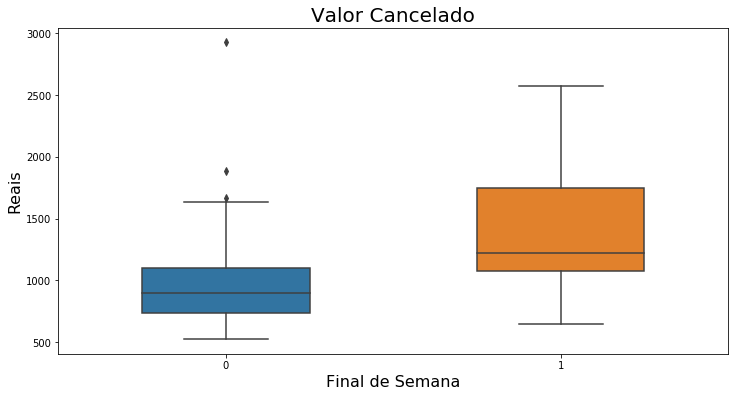

In [0]:
ax = sns.boxplot(y='valor_canc', x='fds', data=dataframe, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor Cancelado', fontsize=20)
ax.set_ylabel('Reais', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

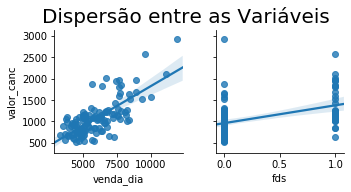

In [0]:
ax = sns.pairplot(dataframe, y_vars='valor_canc', x_vars=['venda_dia', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# Regresão Linear

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y = dataframe['valor_canc']
X = dataframe[['venda_dia', 'fds']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

In [0]:
print(f'R² = {model.score(X_train, y_train).round(2)}')

R² = 0.51


## Gerando previsões para os dados de TESTE (X_test)

In [0]:
y_predict = model.predict(X_test)

## Obtendo o coeficiente de determinação (R²)

In [0]:
print(f'R² = {metrics.r2_score(y_test, y_predict).round(2)}')

R² = 0.62


## Conclusão


## Previsões

In [0]:
entry =  X_test[0:1]
model.predict(entry)[0].round(2)

1124.59

## Simulador

In [0]:
venda_dia = 7000.0
fds = 1

entry = [[venda_dia, fds]]

print('R$ {0:.2f}'.format(model.predict(entry)[0]))

R$ 1332.47


## Obtendo os coeficientes de regressão

In [0]:
index = ['Intercepto', 'Vendas do Dia', 'Final de Semana']

pd.DataFrame(data=np.append(model.intercept_, model.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,1.634031
Vendas do Dia,0.178476
Final de Semana,81.507763


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Valor de Cancelamento seria de <b>R$ 1,63</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Vendas do Dia</b> → Mantendo-se os valores de $X_3$ (Final de Semana) constantes, o acréscimo de 1 real na Venda do dia gera uma variação média no Valor Cancelado de <b>R$ 0,17</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Vendas do Dia) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Valor Cancelado de <b>R$ 81,50</b>.
</p>